In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import sympy as sp

plt.style.use('tableau-colorblind10')

In [2]:
def f(x):
    return x**2 + x +1

def g(x):
    return np.sqrt(1-x**2)

def h(x):
    return 1/np.sqrt(x)

In [3]:
x = sp.symbols('x')

f_int = float(sp.integrate(x**2 + x + 1, (x, 0,1)))
g_int = float(sp.integrate(sp.sqrt(1-x**2), (x, 0,1)))
h_int = float(sp.integrate(1/sp.sqrt(x), (x, 0,1)))


print(f_int, g_int, h_int)

1.8333333333333333 0.7853981633974483 2.0


In [4]:
def hit_and_miss(f, a, b, n):
    np.random.seed(13)
    xs = np.random.uniform(a, b, n)
    y_max = max(f(xs))
    ys = np.random.uniform(0, y_max, n)

    hits = ys < f(xs)
    return hits.sum() / n * (b-a) * y_max



In [234]:
df = pd.DataFrame()
df['n'] = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

df['I^(f)'] = [hit_and_miss(f, 0, 1, n) for n in df['n']]
df['|I^(f) - I(f)|'] = np.abs(df['I^(f)'] - f_int)

df['I^(g)'] = [hit_and_miss(g, 0, 1, n) for n in df['n']]
df['|I^(g) - I(g)|'] = np.abs(df['I^(g)'] - g_int)

df['I^(h)'] = [hit_and_miss(h, 1e-3, 1, n) for n in df['n']]
df['|I^(h) - I(h)|'] = np.abs(df['I^(h)'] - h_int)
df.to_latex(index=False)

'\\begin{tabular}{rrrrrrr}\n\\toprule\nn & I^(f) & |I^(f) - I(f)| & I^(g) & |I^(g) - I(g)| & I^(h) & |I^(h) - I(h)| \\\\\n\\midrule\n10 & 2.626699 & 0.793365 & 0.777102 & 0.008296 & 1.841801 & 0.158199 \\\\\n100 & 1.950328 & 0.116995 & 0.850000 & 0.064602 & 2.198207 & 0.198207 \\\\\n1000 & 1.853415 & 0.020081 & 0.791000 & 0.005602 & 1.821372 & 0.178628 \\\\\n10000 & 1.832664 & 0.000670 & 0.780400 & 0.004998 & 2.051696 & 0.051696 \\\\\n100000 & 1.830359 & 0.002975 & 0.785730 & 0.000332 & 1.945955 & 0.054045 \\\\\n1000000 & 1.835177 & 0.001843 & 0.785583 & 0.000185 & 1.934657 & 0.065343 \\\\\n10000000 & 1.832565 & 0.000769 & 0.785335 & 0.000063 & 1.939017 & 0.060983 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [209]:
print(df.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
n & I^(f) & |I^(f) - I(f)| & I^(g) & |I^(g) - I(g)| & I^(h) & |I^(h) - I(h)| \\
\midrule
10 & 2.569115 & 0.735781 & 0.698818 & 0.086580 & 2.055964 & 0.055964 \\
100 & 1.776500 & 0.056834 & 0.799988 & 0.014590 & 1.856292 & 0.143708 \\
1000 & 1.799492 & 0.033841 & 0.777992 & 0.007407 & 1.957624 & 0.042376 \\
10000 & 1.809089 & 0.024244 & 0.788900 & 0.003502 & 1.925381 & 0.074619 \\
100000 & 1.832565 & 0.000768 & 0.784400 & 0.000998 & 1.888359 & 0.111641 \\
1000000 & 1.837197 & 0.003864 & 0.785466 & 0.000068 & 1.943869 & 0.056131 \\
10000000 & 1.832615 & 0.000719 & 0.785394 & 0.000004 & 1.935147 & 0.064853 \\
\bottomrule
\end{tabular}



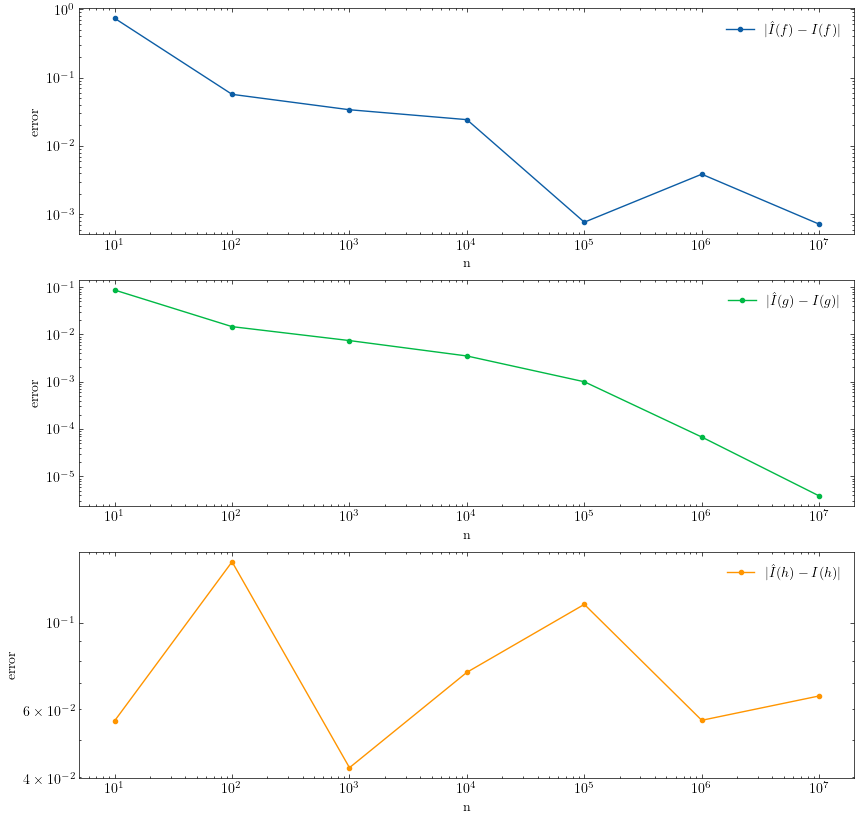

In [210]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for i, (fun, f_name, ax) in enumerate(zip([f, g, h], ['f', 'g', 'h'], ax.flat)):
    ax.loglog(df['n'], df[f'|I^({f_name}) - I({f_name})|'], label=rf'$|\hat{{I}}({f_name}) - I({f_name})|$', 
    c=f'C{i}', marker='o', markersize=3, linestyle='-', linewidth=1)
    ax.set_xlabel('n')
    ax.set_ylabel('error')
    ax.legend()

fig.savefig('mc.png')

In [5]:
def rectangular_rule(f, a, b, p):
    n = int((b-a)/p)
    xs = np.linspace(a+p/2, b-p/2, n)
    return p * np.sum(f(xs))

In [236]:
df = pd.DataFrame()
df['p'] = [1e-3, 1e-4, 1e-5, 1e-6]

df['1/p'] = 1/df['p']

df['I^(f)'] = [rectangular_rule(f, 0, 1, p) for p in df['p']]
df['|I^(f) - I(f)|'] = np.abs(df['I^(f)'] - f_int)

df['I^(g)'] = [rectangular_rule(g, 0, 1, p) for p in df['p']]
df['|I^(g) - I(g)|'] = np.abs(df['I^(g)'] - g_int)

df['I^(h)'] = [rectangular_rule(h, 0, 1, p) for p in df['p']]
df['|I^(h) - I(h)|'] = np.abs(df['I^(h)'] - h_int)

,p,1/p,I^(f),|I^(f) - I(f)|,I^(g),|I^(g) - I(g)|,I^(h),|I^(h) - I(h)|
0,0.001000,1000.0,1.833333,8.333333e-08,0.785401,2.722831e-06,1.980871,0.019129
1,0.000100,10000.0,1.833333,8.333332e-10,0.785398,8.610871e-08,1.993951,0.006049
2,0.000010,100000.0,1.833315,1.833333e-05,0.785390,7.851287e-06,1.998067,0.001933
3,0.000001,1000000.0,1.833333,8.326673e-14,0.785398,8.610879e-11,1.999395,0.000605


In [220]:
print(df.to_latex(index=False, float_format=lambda x: f'{x:.8}'))

\begin{tabular}{rrrrrrrr}
\toprule
p & 1/p & I^(f) & |I^(f) - I(f)| & I^(g) & |I^(g) - I(g)| & I^(h) & |I^(h) - I(h)| \\
\midrule
0.001 & 1000.0 & 1.8333332 & 8.3333333e-08 & 0.78540089 & 2.7228308e-06 & 1.9808714 & 0.019128554 \\
0.0001 & 10000.0 & 1.8333333 & 8.3333318e-10 & 0.78539825 & 8.6108711e-08 & 1.993951 & 0.0060489862 \\
1e-05 & 100000.0 & 1.833315 & 1.8333325e-05 & 0.78539031 & 7.8512871e-06 & 1.9980672 & 0.0019328103 \\
1e-06 & 1000000.0 & 1.8333333 & 8.3266727e-14 & 0.78539816 & 8.6108787e-11 & 1.9993951 & 0.00060489864 \\
\bottomrule
\end{tabular}



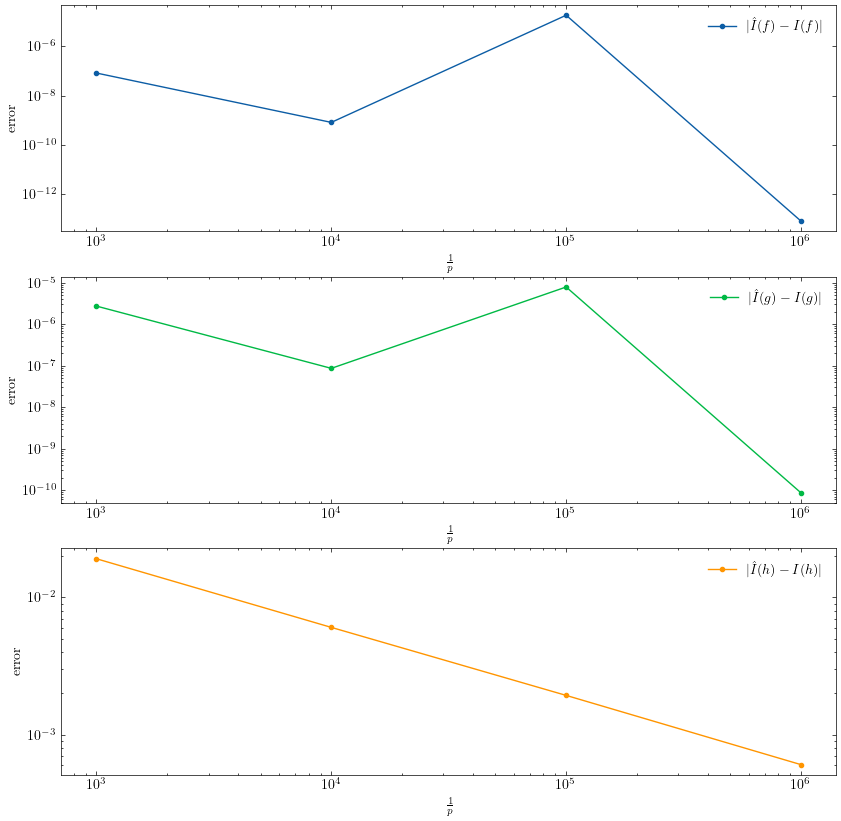

In [222]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for i, (fun, f_name, ax) in enumerate(zip([f, g, h], ['f', 'g', 'h'], ax.flat)):
    ax.loglog(df['1/p'], df[f'|I^({f_name}) - I({f_name})|'], label=rf'$|\hat{{I}}({f_name}) - I({f_name})|$', 

    c=f'C{i}', marker='o', markersize=3, linestyle='-', linewidth=1)

    ax.set_xlabel(r'$\frac{1}{p}$')
    ax.set_ylabel('error')
    ax.legend()
fig.savefig('rect.png')

In [6]:
from time import perf_counter

df = pd.DataFrame()

df['p'] = [1e-3, 1e-4, 1e-5, 1e-6]
df['1/p'] = 1/df['p']


for fun, f_name in zip([f, g, h], ['f', 'g', 'h']):
    rect_times = []
    monte_carlo_times = []
    for p in df['p']:
        start = perf_counter()
        I = rectangular_rule(fun, 0, 1, p)
        elapsed = perf_counter() - start
        rect_times.append(elapsed)



        start = perf_counter()
        I = hit_and_miss(fun, 0, 1, int(1/(p)))
        elapsed = perf_counter() - start

        monte_carlo_times.append(elapsed)
    
    df[f'Rect I({f_name})'] = rect_times
    df[f'HM I({f_name})'] = monte_carlo_times

print(df.to_latex(index=False))

\begin{tabular}{rrrrrrrr}
\toprule
p & 1/p & Rect I(f) & HM I(f) & Rect I(g) & HM I(g) & Rect I(h) & HM I(h) \\
\midrule
0.001000 & 1000.000000 & 0.000378 & 0.001289 & 0.000080 & 0.000148 & 0.000075 & 0.000117 \\
0.000100 & 10000.000000 & 0.000245 & 0.005892 & 0.000160 & 0.000851 & 0.000120 & 0.000751 \\
0.000010 & 100000.000000 & 0.001918 & 0.031326 & 0.001377 & 0.008713 & 0.001342 & 0.008055 \\
0.000001 & 1000000.000000 & 0.022898 & 0.100753 & 0.008598 & 0.090090 & 0.009032 & 0.086791 \\
\bottomrule
\end{tabular}



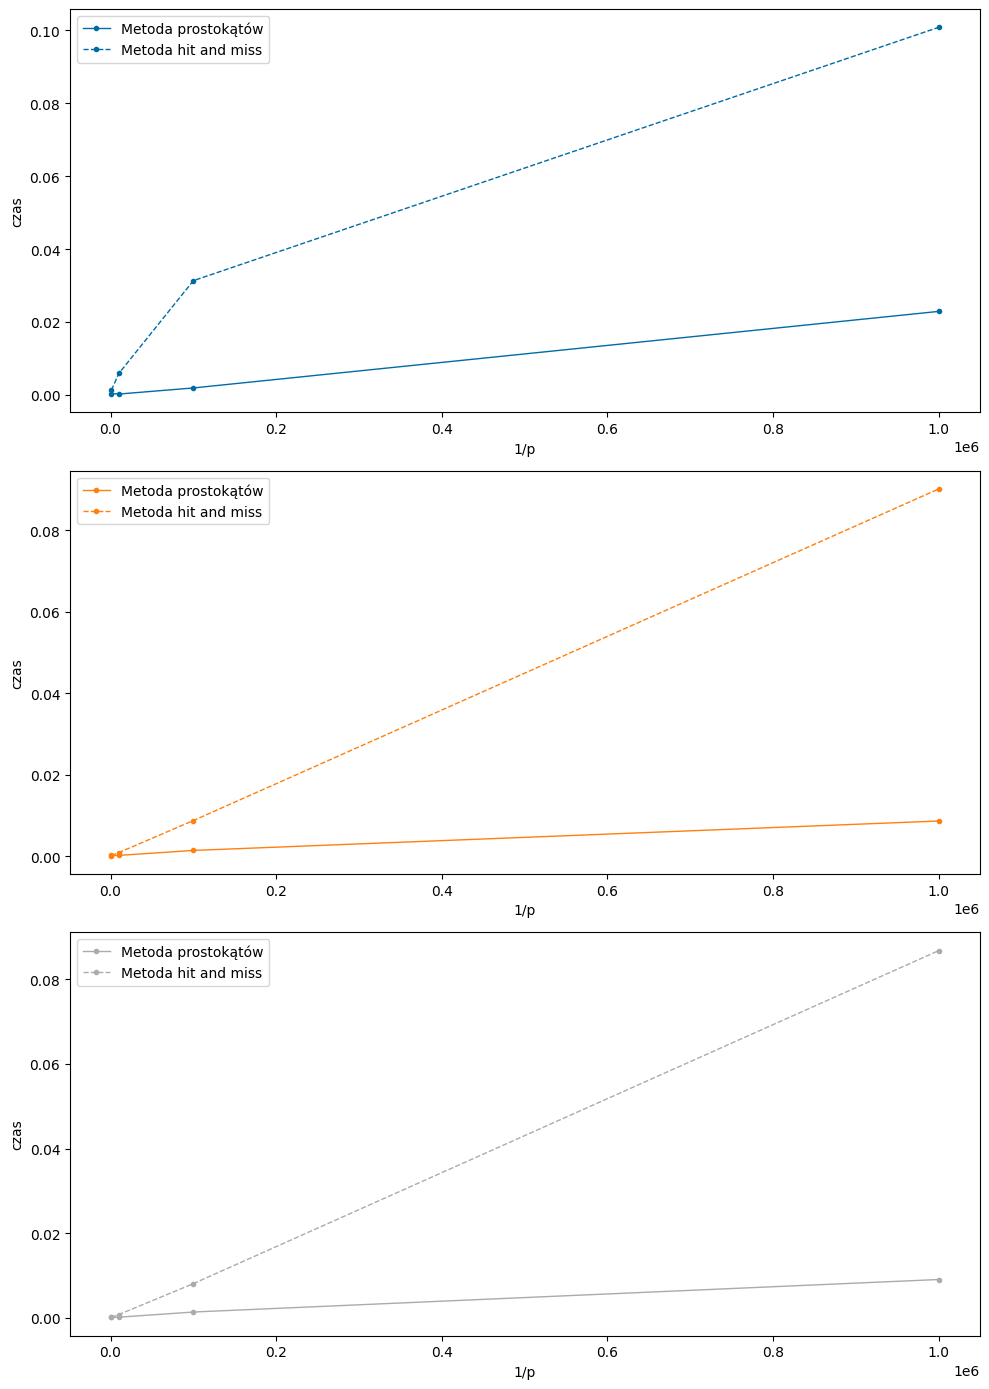

In [10]:

fig, ax = plt.subplots(3, 1, figsize=(10, 14))

for i, (fun, f_name, ax) in enumerate(zip([f, g, h], ['f', 'g', 'h'], ax.flat)):
    ax.plot(1/df['p'], df[f'Rect I({f_name})'], label='Metoda prostokątów', 
    c=f'C{i}', marker='o', markersize=3, linestyle='-', linewidth=1)
    ax.plot(1/df['p'], df[f'HM I({f_name})'], label='Metoda hit and miss', 
    c=f'C{i}', marker='o', markersize=3, linestyle='--', linewidth=1)

    ax.set_xlabel(r'1/p')
    ax.set_ylabel('czas')
    ax.legend()
fig.savefig('time.png')

plt.tight_layout()